## Cluster Analysis with PCA 

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl
from sklearn.decomposition import PCA

In [4]:
# Define path

path = r'/Users/tanu/Desktop/Data Analytics/Achievement 6/Data'

In [6]:
df= pd.read_csv(os.path.join(path,'Prepared data','Global_Cybersecurity_Treats.csv'))

In [10]:
df_scaled = df

In [14]:
# Select numeric and categorical columns
numeric_cols = ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']
categorical_cols = ['Country', 'Attack Type', 'Target Industry', 'Attack Source',
                    'Security Vulnerability Type', 'Defense Mechanism Used']

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Combine numeric and encoded categorical data
df_combined = pd.concat([df[numeric_cols], df_encoded], axis=1)

# Scale the combined data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_combined)

In [24]:
kmeans = KMeans(n_clusters=8, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Add clusters to a new DataFrame
pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

In [26]:
pca_df.head()

,PC1,PC2,Cluster
0,1.409283,0.675928,1
1,1.576183,0.054013,1
2,0.265392,-0.899412,2
3,0.537892,1.367630,7
4,1.231494,-0.789654,2


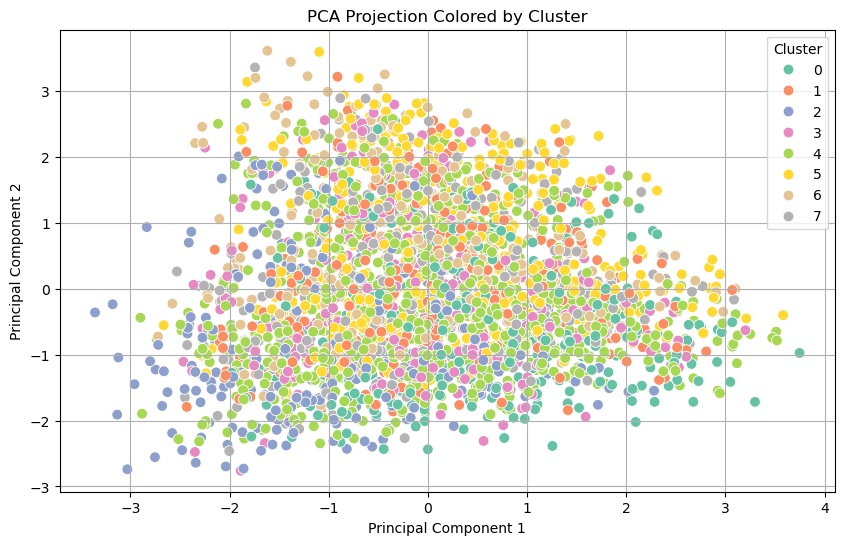

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('PCA Projection Colored by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()